# Frequency analysis and sentiment with NLTK

find_word_freq_readfiles.ipynb

### 1 ###
•	It reads the dataframe with the analysis (file_df_analysis) and the dataframe with the histogram (file_df_analysis_hist) information created by “analyse_papers.ipynb”
•	Frequency analysis of the sentence where a paper was cited. It finds a representative sentence showing how the a paper has been cited in the different sections. It is selected by getting the list of sentences containing the maximum number of most frequent words used when citing the paper (in each section). If there are several sentences it picks the shortest one.

### 2 ###
•	Sentiment analysis using NLTK.



##############################################################


### 1 ###
•	It reads the dataframe with the analysis (file_df_analysis) and the dataframe with the histogram (file_df_analysis_hist) information created by “analyse_papers.ipynb”
•	Frequency analysis of the sentence were a paper was cited. It finds a representative sentence showing how the a paper has been cited in the different sections. It is selected by getting the list of sentences containing the maximum number of most frequent words used when citing the paper (in each section). If there are several sentences it picks the shortest one.


In [2]:
%matplotlib inline

In [3]:
import sys
import os
import re
from copy import deepcopy
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

sys.path.insert(0, "./modules")
import words_frec_analysis_get_sentence

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Configuration

In [49]:
data_path = 'data'

#ds_name = 'DOI_cited_science_1179052_retracted'


%store -r file_df
%store -r cited_DOI_to_analyse

ds_name = file_df


analysis_path = os.path.join(data_path, 'analysis')

# In
citing_sections_tsv = os.path.join(analysis_path, '%s_sections.tsv' % ds_name)
analysis_hist_tsv = os.path.join(analysis_path, '%s_hist.tsv' % ds_name)

In [50]:
ds_name

'DOI_cited_science_1179052_retracted'

# Setup

In [5]:
# One time download
nltk.download("stopwords")
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Analysis

In [42]:
df_all_DOIs = pd.read_csv(citing_sections_tsv, sep='\t', encoding='utf-8')
df_all_DOIs.head()

df = df_all_DOIs[df_all_DOIs.cited_DOI == cited_DOI_to_analyse]
df.head()


,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_intro,sentence_citing_maintext
0,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
1,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
2,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
3,10.1016/0003-2697(89)90602-7,True,True,True,False,DOI not found,False,False,False,True,Not found,NaN,NaN,NaN,NaN
4,10.1016/0003-2697(89)90602-7,False,False,False,False,10.1186/1471-2091-12-17,True,True,True,True,Not found,NaN,NaN,NaN,NaN


In [38]:
df_hist_all_DOIs = pd.read_csv(analysis_hist_tsv, sep='\t', encoding='utf-8')
df_hist = df_hist_all_DOIs[df_hist_all_DOIs.DOI_cited == cited_DOI_to_analyse]
df_hist

,DOI_cited,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,papers_all_sections_found,total_papers_citing
3,10.1016/0003-2697(89)90602-7,0.241379,0.448276,0.62069,0.068966,29,34


In [41]:
df[df['cited_DOI'] == df_hist.iloc[0].DOI_cited]

,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_intro,sentence_citing_maintext
0,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
1,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
2,10.1016/0003-2697(89)90602-7,False,True,True,False,DOI not found,True,False,False,True,Not found,NaN,NaN,NaN,NaN
3,10.1016/0003-2697(89)90602-7,True,True,True,False,DOI not found,False,False,False,True,Not found,NaN,NaN,NaN,NaN
4,10.1016/0003-2697(89)90602-7,False,False,False,False,10.1186/1471-2091-12-17,True,True,True,True,Not found,NaN,NaN,NaN,NaN
5,10.1016/0003-2697(89)90602-7,False,False,False,False,10.1186/1471-2091-11-4,True,True,True,True,Not found,NaN,NaN,NaN,NaN
6,10.1016/0003-2697(89)90602-7,False,False,False,False,10.1186/1471-2091-12-12,True,True,True,True,Not found,NaN,NaN,NaN,NaN
7,10.1016/0003-2697(89)90602-7,False,False,False,False,DOI not found,True,True,True,True,Not found,NaN,NaN,NaN,NaN
8,10.1016/0003-2697(89)90602-7,False,True,False,True,DOI not found,True,True,True,True,Not found,NaN,NaN,NaN,NaN
9,10.1016/0003-2697(89)90602-7,False,False,False,False,DOI not found,True,True,True,True,Not found,NaN,NaN,NaN,NaN


In [40]:
df_filtered = df['sentence_citing_maintext'].dropna()

df_filtered

Series([], Name: sentence_citing_maintext, dtype: float64)

In [9]:
was_intro_found = df['introduction_found'] == True
df_filtered = df[was_intro_found]
print(df_filtered.shape)
df_filtered

(31, 15)


,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_intro,sentence_citing_maintext
1,10.1126/science.1179052,False,False,True,False,10.1186/1471-2180-11-2,True,True,True,True,B8,NaN,NaN,['The most recent example is xenotropic murine...,NaN
2,10.1126/science.1179052,True,False,False,False,10.1186/1471-2377-11-37,True,True,True,True,B47,['This report of the possible contribution of ...,NaN,NaN,NaN
3,10.1126/science.1179052,False,False,False,False,10.1186/1471-2377-11-62,True,True,True,True,B43,NaN,NaN,NaN,NaN
4,10.1126/science.1179052,False,False,True,False,10.1186/1471-2377-11-82,True,True,True,True,B31,NaN,NaN,['Novel retroviruses may also be involved [<xr...,NaN
5,10.1126/science.1179052,False,True,False,True,10.1186/1471-2377-10-73,True,True,True,True,B25,NaN,"['Recently, a link between the xenotropic muri...",NaN,"['Recently, a link between the xenotropic muri..."
6,10.1126/science.1179052,False,True,False,True,10.1186/1744-9081-6-76,True,True,True,True,B11,NaN,['Evidence of xenotropic murine leukemia virus...,NaN,['Evidence of xenotropic murine leukemia virus...
7,10.1126/science.1179052,False,False,False,False,10.1186/1477-7525-12-64,True,True,True,True,B50,NaN,NaN,NaN,NaN
8,10.1126/science.1179052,False,True,False,True,10.1186/1479-5876-8-1,True,True,True,True,B47,NaN,['These deficiencies in NK activity may increa...,NaN,['These deficiencies in NK activity may increa...
9,10.1126/science.1179052,False,True,True,True,10.1186/1479-5876-7-96,True,True,True,True,B13,NaN,['Both cell associated and cell-free transmiss...,['These observations have led to reports of as...,['Both cell associated and cell-free transmiss...
12,10.1126/science.1179052,False,False,False,True,10.1186/1743-7075-7-79,True,False,True,True,B30,NaN,NaN,NaN,['reported finding a gammaretrovirus in periph...


In [10]:
df_filtered.drop('sentence_citing_intro', axis=1, inplace=False).describe()

,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_maintext
count,31,31,31,31,31,31,31,31,31,31,31,3,13,20
unique,1,2,2,2,2,31,2,2,1,1,20,3,13,20
top,10.1126/science.1179052,False,False,True,True,10.1186/1479-5876-7-96,True,True,True,True,B3,['These reports have lead to the retraction of...,['<sec><title>Results and Discussion</title><s...,"['[<xref ref-type=""bibr"" rid=""B8"">8</xref>] (T..."
freq,31,28,18,21,20,1,27,24,31,31,4,1,1,1


#### Let's find the most frequent words in an example of a representative sentence for each section (intro, discussion, etc) where the paper is cited.

In [9]:
df = pd.read_csv(citing_sections_tsv, sep='\t', encoding='utf-8')
#  df['cited_DOI', 'cited_in_conclusions','cited_in_discussion',
#    'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
#    'conclusions_found', 'discussion_found', 'introduction_found',
#    'maintext_found', 'reference_id', 'sentence_citing_conclusions',
#    'sentence_citing_discussion', 'sentence_citing_intro', 'sentence_citing_maintext']


print('cited_DOI: ', df.cited_DOI.unique())


print("\n------------- ANALYSIS INTRODUCTION -----------")
sentences_intro = df.sentence_citing_intro.dropna()
if not sentences_intro.empty:
    words_frec_analysis_get_sentence.analysis(sentences_intro)
else:
    print("No sentences to analyse")

print("\n------------- ANALYSIS MAINTEXT -----------")
sentences_maintext = df.sentence_citing_maintext.dropna()
if not sentences_maintext.empty:
    words_frec_analysis_get_sentence.analysis(sentences_maintext)
else:
    print("No sentences to analyse")

print("\n------------- ANALYSIS DISCUSSION -----------")
sentences_discussion = df.sentence_citing_discussion.dropna()
if not sentences_discussion.empty:
    words_frec_analysis_get_sentence.analysis(sentences_discussion)
else:
    print("No sentences to analyse")
    
    
print("\n ------------- ANALYSIS CONCLUSIONS -----------")

sentences_conclusions = df.sentence_citing_conclusions.dropna()
if not sentences_conclusions.empty:
    words_frec_analysis_get_sentence.analysis(sentences_conclusions)
else:
    print("No sentences to analyse")    


cited_DOI:  ['10.1126/science.1179052']

------------- ANALYSIS INTRODUCTION -----------
Most frequent words:  ['associated', 'attention', 'attracted', 'based', 'blood', 'cancer', 'carolina', 'carried', 'cases', 'ced', 'cell', 'cells', 'certain', 'cfs', 'chenged', 'chronic', 'clusters', 'cohort', 'cohorts', 'community', 'compared', 'condition', 'control', 'controls', 'dectable', 'dected', 'dection', 'defence', 'described', 'diagnosed', 'discovered', 'discovery', 'diseases', 'dna', 'fatigue', 'finding', 'first', 'fischer', 'florida', 'following', 'found', 'gammarrovirus', 'gammarroviruses', 'hehy', 'however', 'human', 'humans', 'identified', 'inactivating', 'independent', 'infect', 'infection', 'initiy', 'innate', 'investigators', 'ir', 'leukemia', 'levels', 'living', 'mononuclear', 'multiple', 'murine', 'negative', 'nevada', 'newly', 'paper', 'patient', 'patients', 'pbmc', 'pbmcs', 'pcr', 'peripherblood', 'persons', 'perturbations', 'plasma', 'polymorphisms', 'possibility', 'possibly',

Most frequent words:  ['acquired', 'athymic', 'cancer', 'cases', 'cells', 'chronic', 'controversy', 'copies', 'dected', 'deficient', 'derived', 'expression', 'familiprostate', 'fatigue', 'gained', 'identified', 'interest', 'likely', 'many', 'mice', 'originy', 'patients', 'pbmcs', 'present', 'prostate', 'protein', 'recent', 'references', 'rein', 'rnase', 'rv', 'sequences', 'showed', 'significance', 'since', 'source', 'specific', 'specificity', 'syndrome', 'tumor', 'virus', 'work', 'xenografting', 'xmrv']
Frequent words included:  [8, 16, 0, 29]
Maximum words in the same sentence  =  29

 Representative sentence:
39,"['<sec sec-type=""other2""><title>Conclusions</title><p>XMRV, originally identified in RNase L–deficient patients with familial prostate cancer, has gained interest since recent work showed its protein expression in as many as 23% of prostate cancer cases (<xref ref-type=""bibr"" rid=""R10""><italic>10</italic></xref>) and XMRV-specific sequences were detected in PBMCs of 67

### 2 ###


In [ ]:
print("\n Sentiment analysis using NLTK.")

In [2]:
stopwords = nltk.corpus.stopwords

def filter_sentence(citing_sentence):
    if citing_sentence == None:
        return " " #filtered_sentences_noNone.append(" ")
    
    if citing_sentence != None:
        citing_sentence = re.sub("[\<\[].*?[\>\]]", "", citing_sentence) #to remove citations
        #citing_sentence = re.sub("[*?]", "", citing_sentence) #to remove citations
        citing_sentence = re.sub('[0-9]+', '', citing_sentence)
        delete = ["Introduction", "Background", "Conclusions","the", "and", "therefore", "thus"]#, "\n", "<\sub>", "bibr", "ref", "rid", "type", "xref"] #, "/p\np\n", "\p"]
        for word in delete:
            citing_sentence = re.sub(word, "", citing_sentence) 
        #citing_sentence = re.sub("\?", "", citing_sentence) #to remove citations
        citing_sentence = ' '.join([word for word in citing_sentence.split() if word not in (stopwords.words('english'))])
        return citing_sentence # O ?????????filtered_sentences_noNone.append(sentence[0])

def fit_transform_or_empty(vectorizer, data):
    return count_vectorizer.fit_transform(data) if len(data) > 0 else csr_matrix([])

#file_df = '/project/elife/data/analysis/df_1000_1000v2_prep_.csv'
df = pd.read_csv(citing_sections_tsv, sep='\t', encoding='utf-8')

#  df['cited_DOI', 'cited_in_conclusions','cited_in_discussion',
#    'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
#    'conclusions_found', 'discussion_found', 'introduction_found',
#    'maintext_found', 'reference_id', 'sentence_citing_conclusions',
#    'sentence_citing_discussion', 'sentence_citing_intro', 'sentence_citing_maintext']
    


count_vectorizer = CountVectorizer(max_features=5)
#sentence = ''.join(str(string) for string in citing_sentences_list)
#sentence = sentence.decode('utf-8')
#u_sentence = unicode( sentence, "utf-8" )
#backToBytes = u_sentence.encode( "utf-8" )



#sentence = re.sub(r',([0-9])', '\\1', sentence)
# sort out HMTL formatting of &
#sentence = re.sub(r'&amp', 'and', sentence)

citing_sentences_intro_list = df.sentence_citing_intro.dropna()
citing_sentences_maintext_list = df.sentence_citing_maintext.dropna()
citing_sentences_discussion_list = df.sentence_citing_discussion.dropna()
citing_sentences_conclusions_list = df.sentence_citing_conclusions.dropna()
    
citing_sentences_original_intro = deepcopy(citing_sentences_intro_list)
citing_sentences_original_maintext = deepcopy(citing_sentences_maintext_list)
citing_sentences_original_discussion = deepcopy(citing_sentences_discussion_list)
citing_sentences_original_conclusions = deepcopy(citing_sentences_conclusions_list) # This is a list of lists, so you need deepcopy

filtered_sentences_intro_list = citing_sentences_intro_list.apply(filter_sentence)
filtered_sentences_maintext_list = citing_sentences_maintext_list.apply(filter_sentence)
filtered_sentences_discussion_list = citing_sentences_discussion_list.apply(filter_sentence)
filtered_sentences_conclusions_list = citing_sentences_conclusions_list.apply(filter_sentence)        

#filtered_sentences_intro_list = [filter_sentence(sentence) for sentence in citing_sentences_intro_list]
#filtered_sentences_maintext_list = [filter_sentence(sentence) for sentence in citing_sentences_maintext_list]
#filtered_sentences_discussion_list = [filter_sentence(sentence) for sentence in citing_sentences_discussion_list]
#filtered_sentences_conclusions_list = [filter_sentence(sentence) for sentence in citing_sentences_conclusions_list]

#print(filtered_sentences_intro_list)
#citing_sentences_intro_list.apply(filter_sentence)

count_vectors_intro = fit_transform_or_empty(count_vectorizer, filtered_sentences_intro_list)
#print(count_vectorizer.get_feature_names())
#word_frequency_intro = count_vectors_intro.toarray()

count_vectors_maintext = fit_transform_or_empty(count_vectorizer, filtered_sentences_maintext_list)
#print(count_vectorizer.get_feature_names())
#word_frequency_maintext = count_vectors_maintext.toarray()

count_vectors_discussion = fit_transform_or_empty(count_vectorizer, filtered_sentences_discussion_list)
#print(count_vectorizer.get_feature_names())
#word_frequency_discussion = count_vectors_discussion.toarray()

count_vectors_conclusions = fit_transform_or_empty(count_vectorizer, filtered_sentences_conclusions_list)
#print(count_vectorizer.get_feature_names())
#word_frequency_conclusions = count_vectors_conclusions.toarray()


#print(word_frequency_intro)
#print(word_frequency_maintext)
#print(word_frequency_discussion)
#print(word_frequency_conclusions)

number_words_in_sentence_intro = np.sum(count_vectors_intro.toarray(),axis=1).tolist()
number_words_in_sentence_maintext = np.sum(count_vectors_maintext.toarray(),axis=1).tolist()
number_words_in_sentence_discussion = np.sum(count_vectors_discussion.toarray(),axis=1).tolist()
number_words_in_sentence_conclusions = np.sum(count_vectors_conclusions.toarray(),axis=1).tolist()



#print("Frequent words included (intro): ", number_words_in_sentence_intro)
#print("Frequent words included (maintext): ", number_words_in_sentence_maintext)
#print("Frequent words included (discussion): ", number_words_in_sentence_discussion)
#print("Frequent words included (conclusions): ", number_words_in_sentence_conclusions)

#print("maximum words in the same sentence in introduction =", max(number_words_in_sentence_intro))
#print("maximum words in the same sentence in maintext =", max(number_words_in_sentence_maintext))
#print("maximum words in the same sentence in discussion =", max(number_words_in_sentence_discussion))
#print("maximum words in the same sentence in conclusions =", max(number_words_in_sentence_conclusions))

"""
df_sentences_intro = pd.DataFrame({"citing_intro_sentence" : filtered_sentences_intro_list, 
                                 "number_frequent_words" : number_words_in_sentence_intro})
"""
# length of sentence

sentence_length_intro = []
for sentence in citing_sentences_intro_list:
    if sentence == None:
        sentence_length_intro.append(0)
    if sentence != None:
        sentence_length_intro.append(len(sentence))

df_sentences_intro = pd.DataFrame({"frequent_words" : number_words_in_sentence_intro,
                                "citing_sentence" : citing_sentences_original_intro,
                                "sentence_length": sentence_length_intro})


sentences_toCheck = df_sentences_intro[(df_sentences_intro["frequent_words"] == max(df_sentences_intro["frequent_words"]))] #['sentence_citing_intro']
min_length= min(sentences_toCheck["sentence_length"][:])
#print("min_length: ", min_length)

sentence = sentences_toCheck[sentences_toCheck['sentence_length'] == min_length]["citing_sentence"]

# To print the full content
sentence.to_csv(sys.stdout)

NameError: name 'nltk' is not defined

In [1]:
df = pd.read_csv(citing_sections_tsv, sep='\t', encoding='utf-8')

citing_sentences_intro= df['sentence_citing_maintext']
citing_sentences_intro_list = citing_sentences_intro.tolist()
#print(citing_sentences_intro_list[1])

count_vectorizer = CountVectorizer(max_features=5)
#sentence = ''.join(str(string) for string in citing_sentences_list)
#sentence = sentence.decode('utf-8')
#u_sentence = unicode( sentence, "utf-8" )
#backToBytes = u_sentence.encode( "utf-8" )



#sentence = re.sub(r',([0-9])', '\\1', sentence)
# sort out HMTL formatting of &
#sentence = re.sub(r'&amp', 'and', sentence)

# If you want to avoid to go through all the papers, you can select those with introductions by
# by replacing citing_sentences_intro_list by df_intro_filtered.tolist()


citing_sentences_original = deepcopy(citing_sentences_intro_list) # This is a list of lists, so you need deepcopy
#print(citing_sentences_original[19])
filtered_sentences_noNone = []
filtered_sentences = citing_sentences_intro_list[:]
#print(filtered_sentences[0:1])
for sentence in filtered_sentences:
    if (type(sentence) == float):
        filtered_sentences_noNone.append(" ")
    if (type(sentence) != float):
        #print("######################### ", type(sentence), sentence)
        delete = ["Introduction", "Background", "the", "and"]
        for word in delete:
            sentence = re.sub(word, "", sentence) 
        sentence = re.sub("[\<\[].*?[\>\]]", "", sentence) #to remove cititations
        sentence = ' '.join([word for word in sentence.split() if word not in (stopwords.words('english'))])
        filtered_sentences_noNone.append(sentence)

count_vectorizer.fit_transform(filtered_sentences_noNone) #backToBytes
#print(citing_sentences_original[19]) 
    
#print(count_vectorizer.get_feature_names())
count_vectors = count_vectorizer.transform(filtered_sentences_noNone)

word_frequency = count_vectors.toarray()
#print(word_frequency)
number_words_in_sentence = np.sum(count_vectors.toarray(),axis=1).tolist()

#print("Frequent words included: ", number_words_in_sentence)


#print(citing_sentences_intro_list)
print("maximum words in the same sentence =", max(number_words_in_sentence))

#df_introCiting = pd.DataFrame({"citing_intro_sentence" : filtered_sentences_noNone, 
#                                "number_frequent_words" : number_words_in_sentence})
#print(df_introCiting)

# length of sentence
sentence_length = []
for sentence in citing_sentences_intro_list:
    if (sentence == None) | (sentence == np.nan):
        sentence_length.append(0)
    if (sentence != None) & (sentence != np.nan):
        sentence_length.append(len(str(sentence)))



df_introCiting = pd.DataFrame({"frequent_words" : number_words_in_sentence,
                                "citing_sentence" : citing_sentences_original,
                                "sentence_length": sentence_length})


sentences_toCheck = df_introCiting[(df_introCiting["frequent_words"] == max(df_introCiting["frequent_words"]))] #['sentence_citing_intro']
min_length= min(sentences_toCheck["sentence_length"][:])

sentence = sentences_toCheck[sentences_toCheck['sentence_length'] == min_length]["citing_sentence"]

# To print the full content
sentence.to_csv(sys.stdout)



'\ndf = pd.read_csv(citing_sections_tsv, sep=\'\t\', encoding=\'utf-8\')\n\nciting_sentences_intro= df[\'sentence_citing_maintext\']\nciting_sentences_intro_list = citing_sentences_intro.tolist()\n#print(citing_sentences_intro_list[1])\n\ncount_vectorizer = CountVectorizer(max_features=5)\n#sentence = \'\'.join(str(string) for string in citing_sentences_list)\n#sentence = sentence.decode(\'utf-8\')\n#u_sentence = unicode( sentence, "utf-8" )\n#backToBytes = u_sentence.encode( "utf-8" )\n\n\n\n#sentence = re.sub(r\',([0-9])\', \'\\1\', sentence)\n# sort out HMTL formatting of &\n#sentence = re.sub(r\'&amp\', \'and\', sentence)\n\n# If you want to avoid to go through all the papers, you can select those with introductions by\n# by replacing citing_sentences_intro_list by df_intro_filtered.tolist()\n\n\nciting_sentences_original = deepcopy(citing_sentences_intro_list) # This is a list of lists, so you need deepcopy\n#print(citing_sentences_original[19])\nfiltered_sentences_noNone = []\nfi

In [14]:
sid = SentimentIntensityAnalyzer()


df_sentiment = df_introCiting.copy()
#ss = sid.polarity_scores(df_sentiment['citing_sentence'][4][0]) #if None => error
#print(ss)

df_sentiment2 = filtered_sentences_noNone
#ss2 = sid.polarity_scores(df_sentiment2[2])
ss2 = sid.polarity_scores(df_sentiment2[0])

sentiment_scores_list = []
for sentence in df_sentiment2:
    ss2 = sid.polarity_scores(sentence) # from twython  package
    sentiment_scores_list.append(ss2)
df_sentiment_scores = pd.DataFrame(sentiment_scores_list)

    #df_sentiment_scores.append(ss2)
#df_sentiment2


df_sentiment = df_sentiment.join(df_sentiment_scores)

df_sentiment

# for i, tweet in df_sentiment['text'].iteritems():
#     ss = sid.polarity_scores(str(tweet))
#     for k in sorted(ss):
#         df_sentiment.loc[i, k] = ss[k]

,citing_sentence,frequent_words,sentence_length,compound,neg,neu,pos
0,"['[<xref ref-type=""bibr"" rid=""B1"">1</xref>] re...",1,231,-0.3400,0.224,0.658,0.118
1,NaN,0,3,0.0000,0.000,0.000,0.000
2,NaN,0,3,0.0000,0.000,0.000,0.000
3,NaN,0,3,0.0000,0.000,0.000,0.000
4,NaN,0,3,0.0000,0.000,0.000,0.000
5,"['Recently, a link between the xenotropic muri...",0,278,0.0000,0.000,1.000,0.000
6,['Evidence of xenotropic murine leukemia virus...,0,251,0.0000,0.000,1.000,0.000
7,NaN,0,3,0.0000,0.000,0.000,0.000
8,['These deficiencies in NK activity may increa...,0,262,0.0000,0.000,1.000,0.000
9,['Both cell associated and cell-free transmiss...,0,181,0.0000,0.000,1.000,0.000


In [ ]:
print("\n Sentiment analysis using NLTK.")

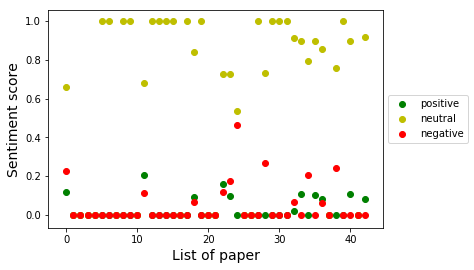

In [15]:
x = np.arange(len(df_sentiment))
df_sentiment['compound']

#plt.close()
#comp = plt.scatter(x,df_sentiment['compound'])
pos = plt.scatter(x,df_sentiment['pos'], color = 'g')
neu = plt.scatter(x,df_sentiment['neu'], color = 'y')
neg = plt.scatter(x,df_sentiment['neg'], color = 'r')

plt.legend((pos, neu, neg),('positive', 'neutral','negative'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("List of paper", fontsize=14)
plt.ylabel("Sentiment score", fontsize=14)

plt.savefig("sentiment.png")
plt.show()
